In [23]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [24]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [4]:
dataset.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1
5,1,1,0,4,0,0,0,0,0,0,...,1,2,1,14379,0,1,0,0,0,1
6,1,0,0,3,0,0,0,0,0,0,...,1,2,1,1762,1,0,0,0,0,1
7,2,0,0,0,0,0,0,0,0,0,...,1,4,0,187,1,0,0,0,0,0
8,2,0,0,2,0,0,0,0,0,0,...,1,2,1,14390,1,1,0,0,0,1
9,1,0,0,1,0,0,0,0,0,0,...,1,4,0,285,0,0,0,0,0,0


In [4]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

30647
27998


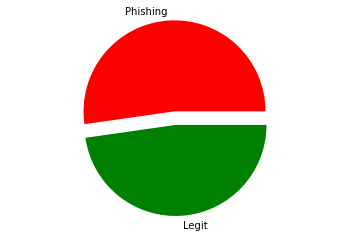

In [6]:
from matplotlib import style

phishing = (dataset['phishing'] == 1).sum() 

legit = (dataset['phishing'] == 0).sum()
print(phishing)
print(legit)
p = [phishing, legit]
plt.pie(p,
       labels = ['Phishing', 'Legit'], 
       colors = ['red', 'green'],  
       explode = (0.15, 0),
       startangle = 0) 
plt.axis('equal') 
plt.show()



In [6]:
#length of dataset before dropping duplicate rows
lengthbeforedropping=len(dataset)
lengthbeforedropping

58645

<AxesSubplot:>

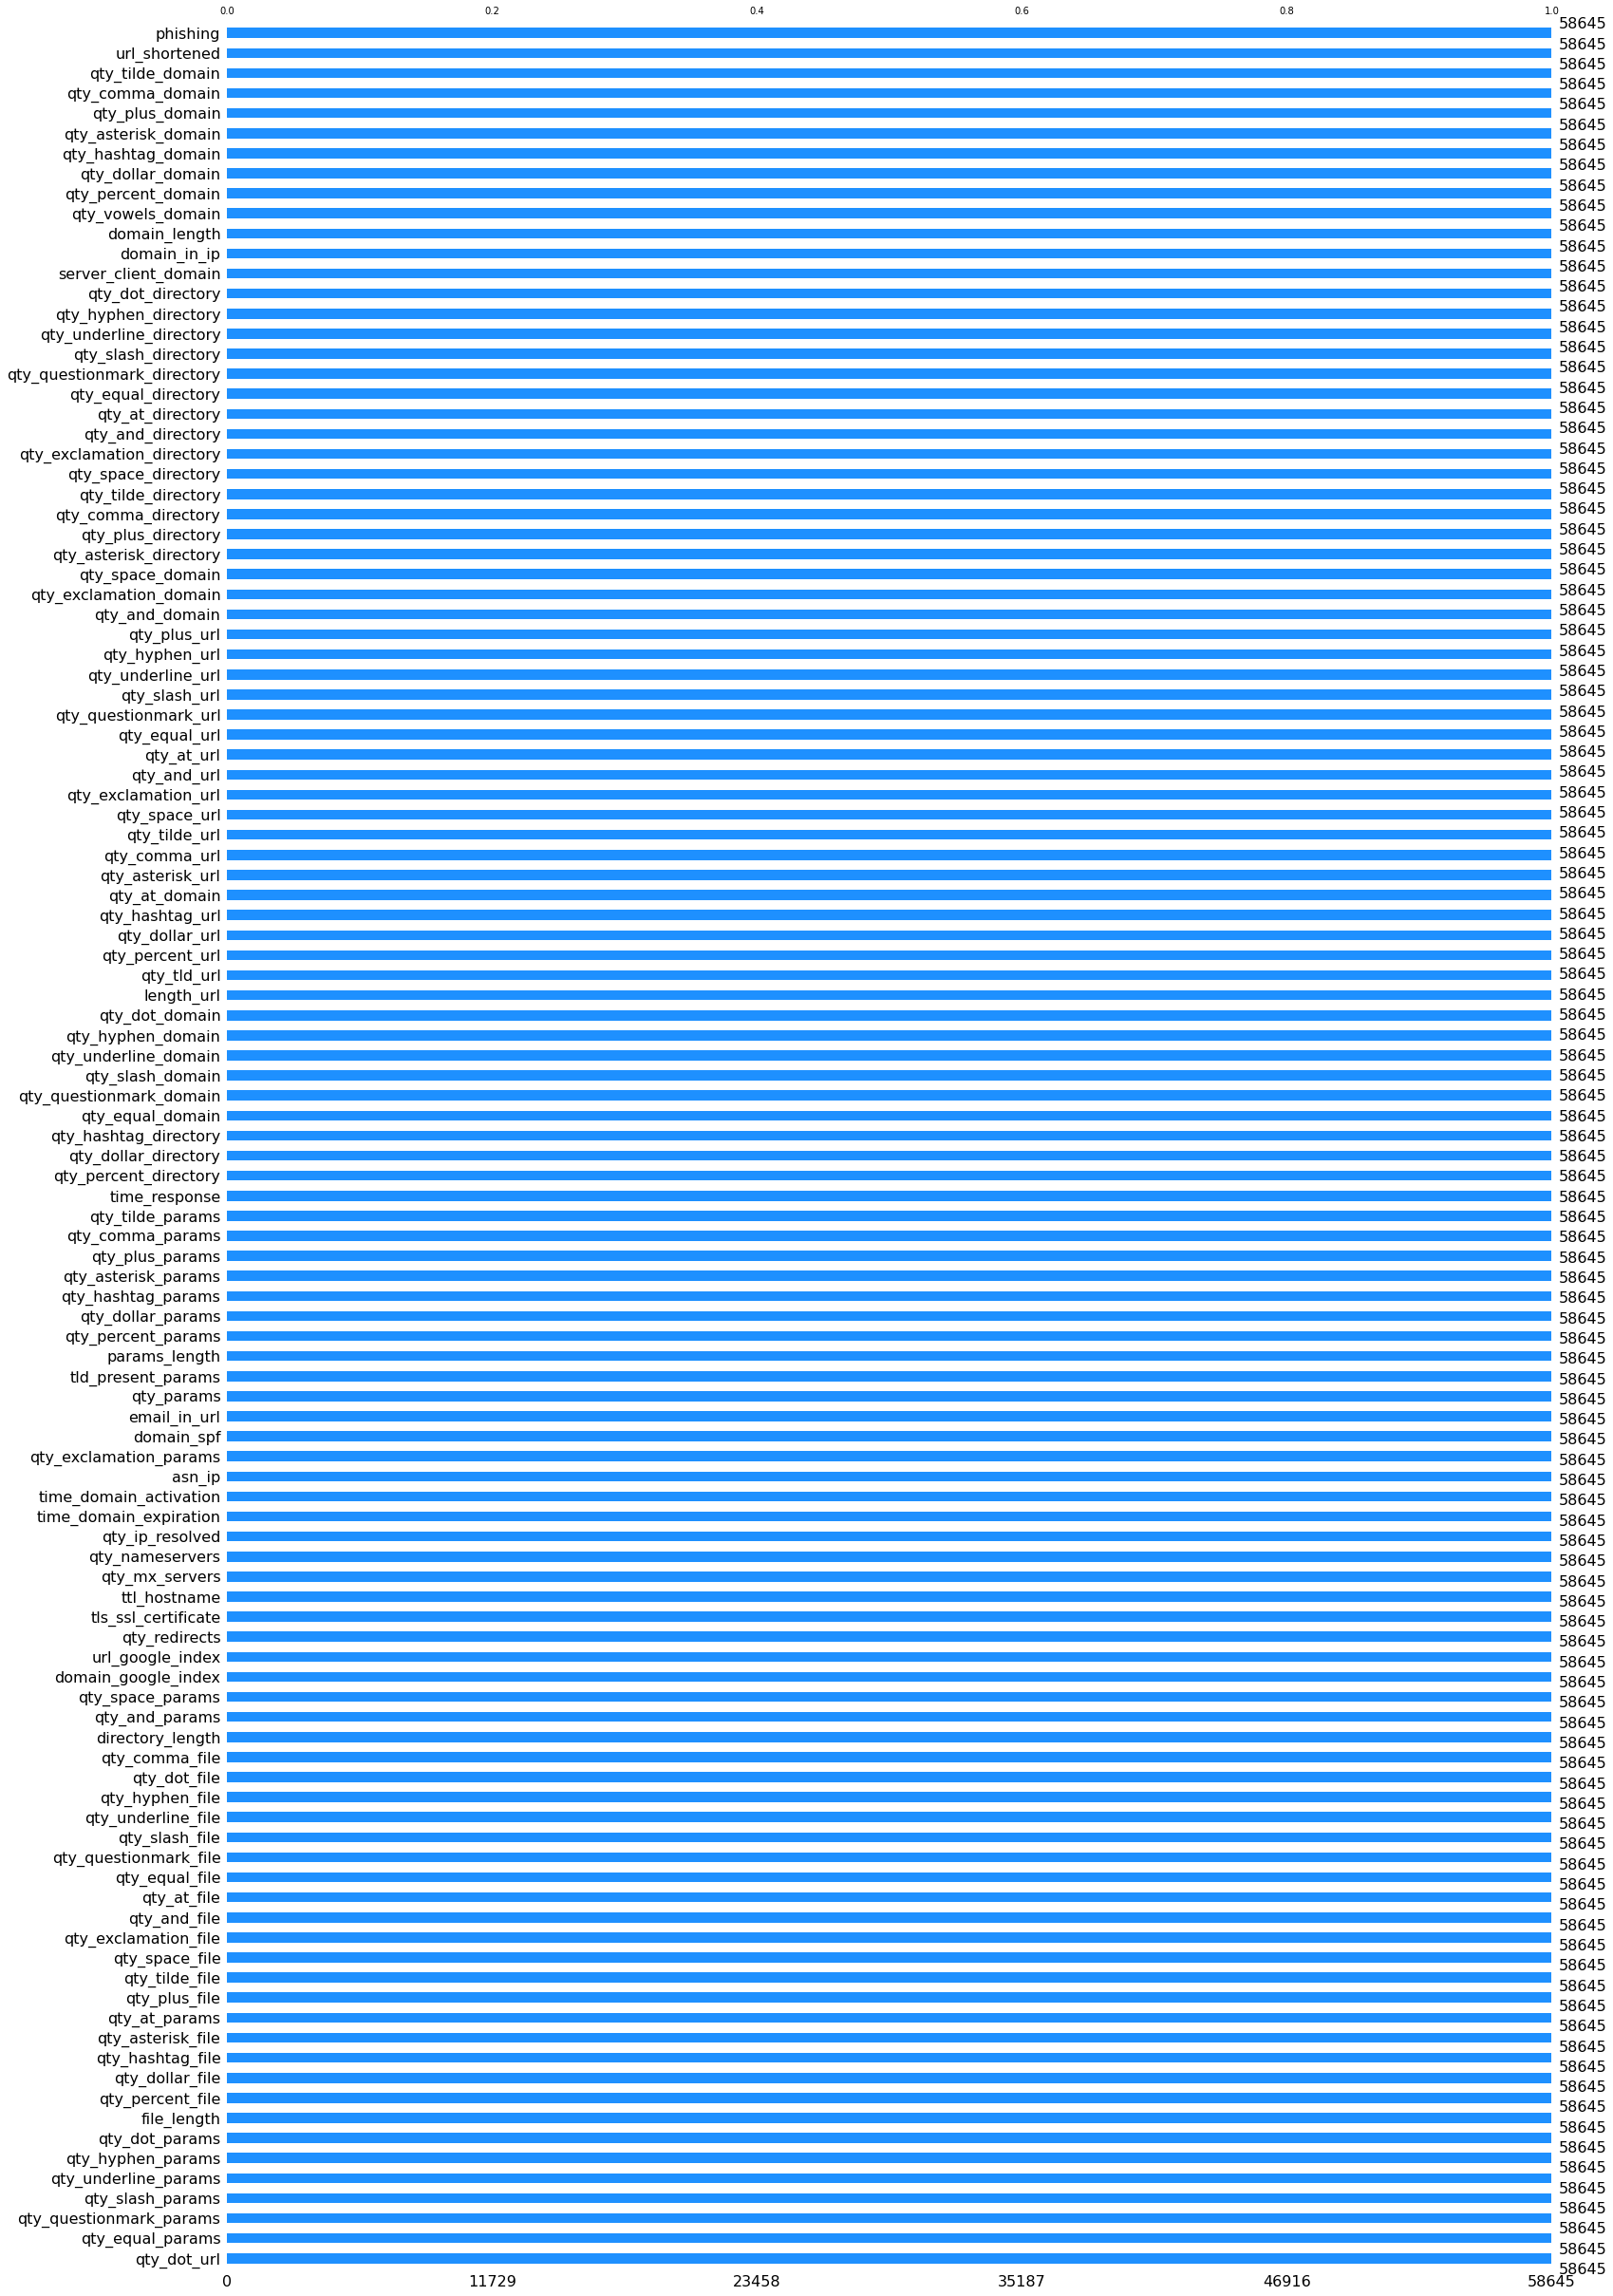

In [25]:
# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending')

In [27]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [37]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

1653

In [28]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()


C:\Users\Checkout\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


qty_dot_url                   56992
qty_hyphen_url                56992
qty_underline_url             56992
qty_slash_url                 56992
qty_questionmark_url          56992
qty_equal_url                 56992
qty_at_url                    56992
qty_and_url                   56992
qty_exclamation_url           56992
qty_space_url                 56992
qty_tilde_url                 56992
qty_comma_url                 56992
qty_plus_url                  56992
qty_asterisk_url              56992
qty_hashtag_url               56992
qty_dollar_url                56992
qty_percent_url               56992
qty_tld_url                   56992
length_url                    56992
qty_dot_domain                56992
qty_hyphen_domain             56992
qty_underline_domain          56992
qty_slash_domain              56992
qty_questionmark_domain       56992
qty_equal_domain              56992
qty_at_domain                 56992
qty_and_domain                56992
qty_exclamation_domain      

In [65]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [9]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

- - - - - New Column Here- - - - - - - 
2     0.504988
1     0.220803
3     0.176503
4     0.058419
5     0.017035
6     0.007707
7     0.003700
14    0.002302
8     0.002046
15    0.001466
9     0.001091
10    0.000818
16    0.000750
13    0.000631
12    0.000563
11    0.000546
17    0.000375
18    0.000102
22    0.000051
20    0.000051
24    0.000017
23    0.000017
19    0.000017
Name: qty_dot_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.768096
1     0.151692
2     0.037139
3     0.014716
4     0.008611
5     0.005985
6     0.003666
7     0.002643
8     0.001893
9     0.001279
10    0.001245
11    0.000904
12    0.000631
13    0.000426
14    0.000222
15    0.000171
17    0.000136
16    0.000085
21    0.000085
18    0.000068
19    0.000051
20    0.000051
31    0.000034
26    0.000034
23    0.000034
25    0.000034
24    0.000017
27    0.000017
35    0.000017
34    0.000017
Name: qty_hyphen_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.909830

- - - - - New Column Here- - - - - - - 
-1     0.873442
 0     0.088362
 1     0.023003
 2     0.005440
 3     0.004399
 4     0.002473
 5     0.000716
 6     0.000682
 7     0.000290
 8     0.000273
 17    0.000256
 11    0.000136
 9     0.000136
 10    0.000119
 19    0.000102
 12    0.000068
 21    0.000034
 15    0.000034
 14    0.000017
 18    0.000017
Name: qty_underline_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1     0.873442
 0     0.114059
 1     0.004382
 3     0.002217
 4     0.001330
 2     0.001211
 5     0.001091
 6     0.000818
 7     0.000631
 10    0.000273
 8     0.000153
 12    0.000136
 9     0.000136
 15    0.000051
 14    0.000034
 11    0.000017
 43    0.000017
Name: qty_slash_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1    0.873442
 0    0.114622
 1    0.011476
 2    0.000358
 3    0.000051
 9    0.000034
 7    0.000017
Name: qty_questionmark_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1     0.873442

-1.000000     0.083980
 0.239533     0.000051
 0.238084     0.000051
 0.181128     0.000051
 0.249483     0.000051
 0.170042     0.000051
 0.433213     0.000051
 0.410012     0.000051
 0.213242     0.000051
 0.239638     0.000051
 0.239613     0.000051
 0.230270     0.000051
 0.331829     0.000051
 0.375082     0.000051
 0.240148     0.000051
 0.340770     0.000051
 0.583816     0.000051
 0.209035     0.000051
 0.200702     0.000051
 0.227684     0.000051
 0.418735     0.000051
 0.117627     0.000051
 0.286573     0.000051
 0.183206     0.000051
 0.200634     0.000051
 0.332349     0.000051
 0.162980     0.000051
 0.191183     0.000051
 0.125101     0.000051
 0.400331     0.000034
 1.304390     0.000034
 0.626418     0.000034
 0.351220     0.000034
 0.610940     0.000034
 0.457798     0.000034
 0.421444     0.000034
 0.295830     0.000034
 0.240035     0.000034
 0.254044     0.000034
 0.518066     0.000034
 0.784048     0.000034
 0.261909     0.000034
 0.417936     0.000034
 0.135227  

-1        0.062205
 299      0.028886
 292      0.024333
 298      0.021246
 291      0.020752
 14391    0.015602
 14390    0.013931
 3598     0.013812
 3599     0.011271
 3592     0.009822
 3591     0.009668
 592      0.008986
 297      0.008526
 591      0.008321
 14392    0.008321
 14389    0.008100
 14398    0.007639
 290      0.007622
 14399    0.006514
 51       0.006326
 599      0.006190
 52       0.006036
 14388    0.005934
 296      0.005917
 0        0.005422
 21598    0.005337
 14387    0.005269
 293      0.005201
 3597     0.005167
 598      0.004962
 14386    0.004638
 3590     0.004638
 21599    0.003956
 590      0.003871
 14396    0.003820
 3596     0.003768
 14385    0.003734
 14397    0.003734
 289      0.003700
 14384    0.003496
 58       0.003479
 14383    0.003376
 295      0.003308
 21591    0.003308
 3589     0.003274
 14395    0.003223
 21592    0.003120
 59       0.003086
 288      0.002916
 14393    0.002848
 14382    0.002796
 1798     0.002677
 50       0.

###Removing the existing -1's and replacing with NAN in order to replace the values using different imputers.


In [29]:
for i,j in cols.items():
    if j>=0.8:
        dataset.drop(i,inplace=True,axis=1)

df_imp=dataset.replace(to_replace = -1,value =np.nan)

### HERE WE HAVE DROPPED ALL THE COLUMNS  WHICH HAVE A PERCENTAGE OF -1'S MORE 80%.


In [ ]:
df_imp

<AxesSubplot:>

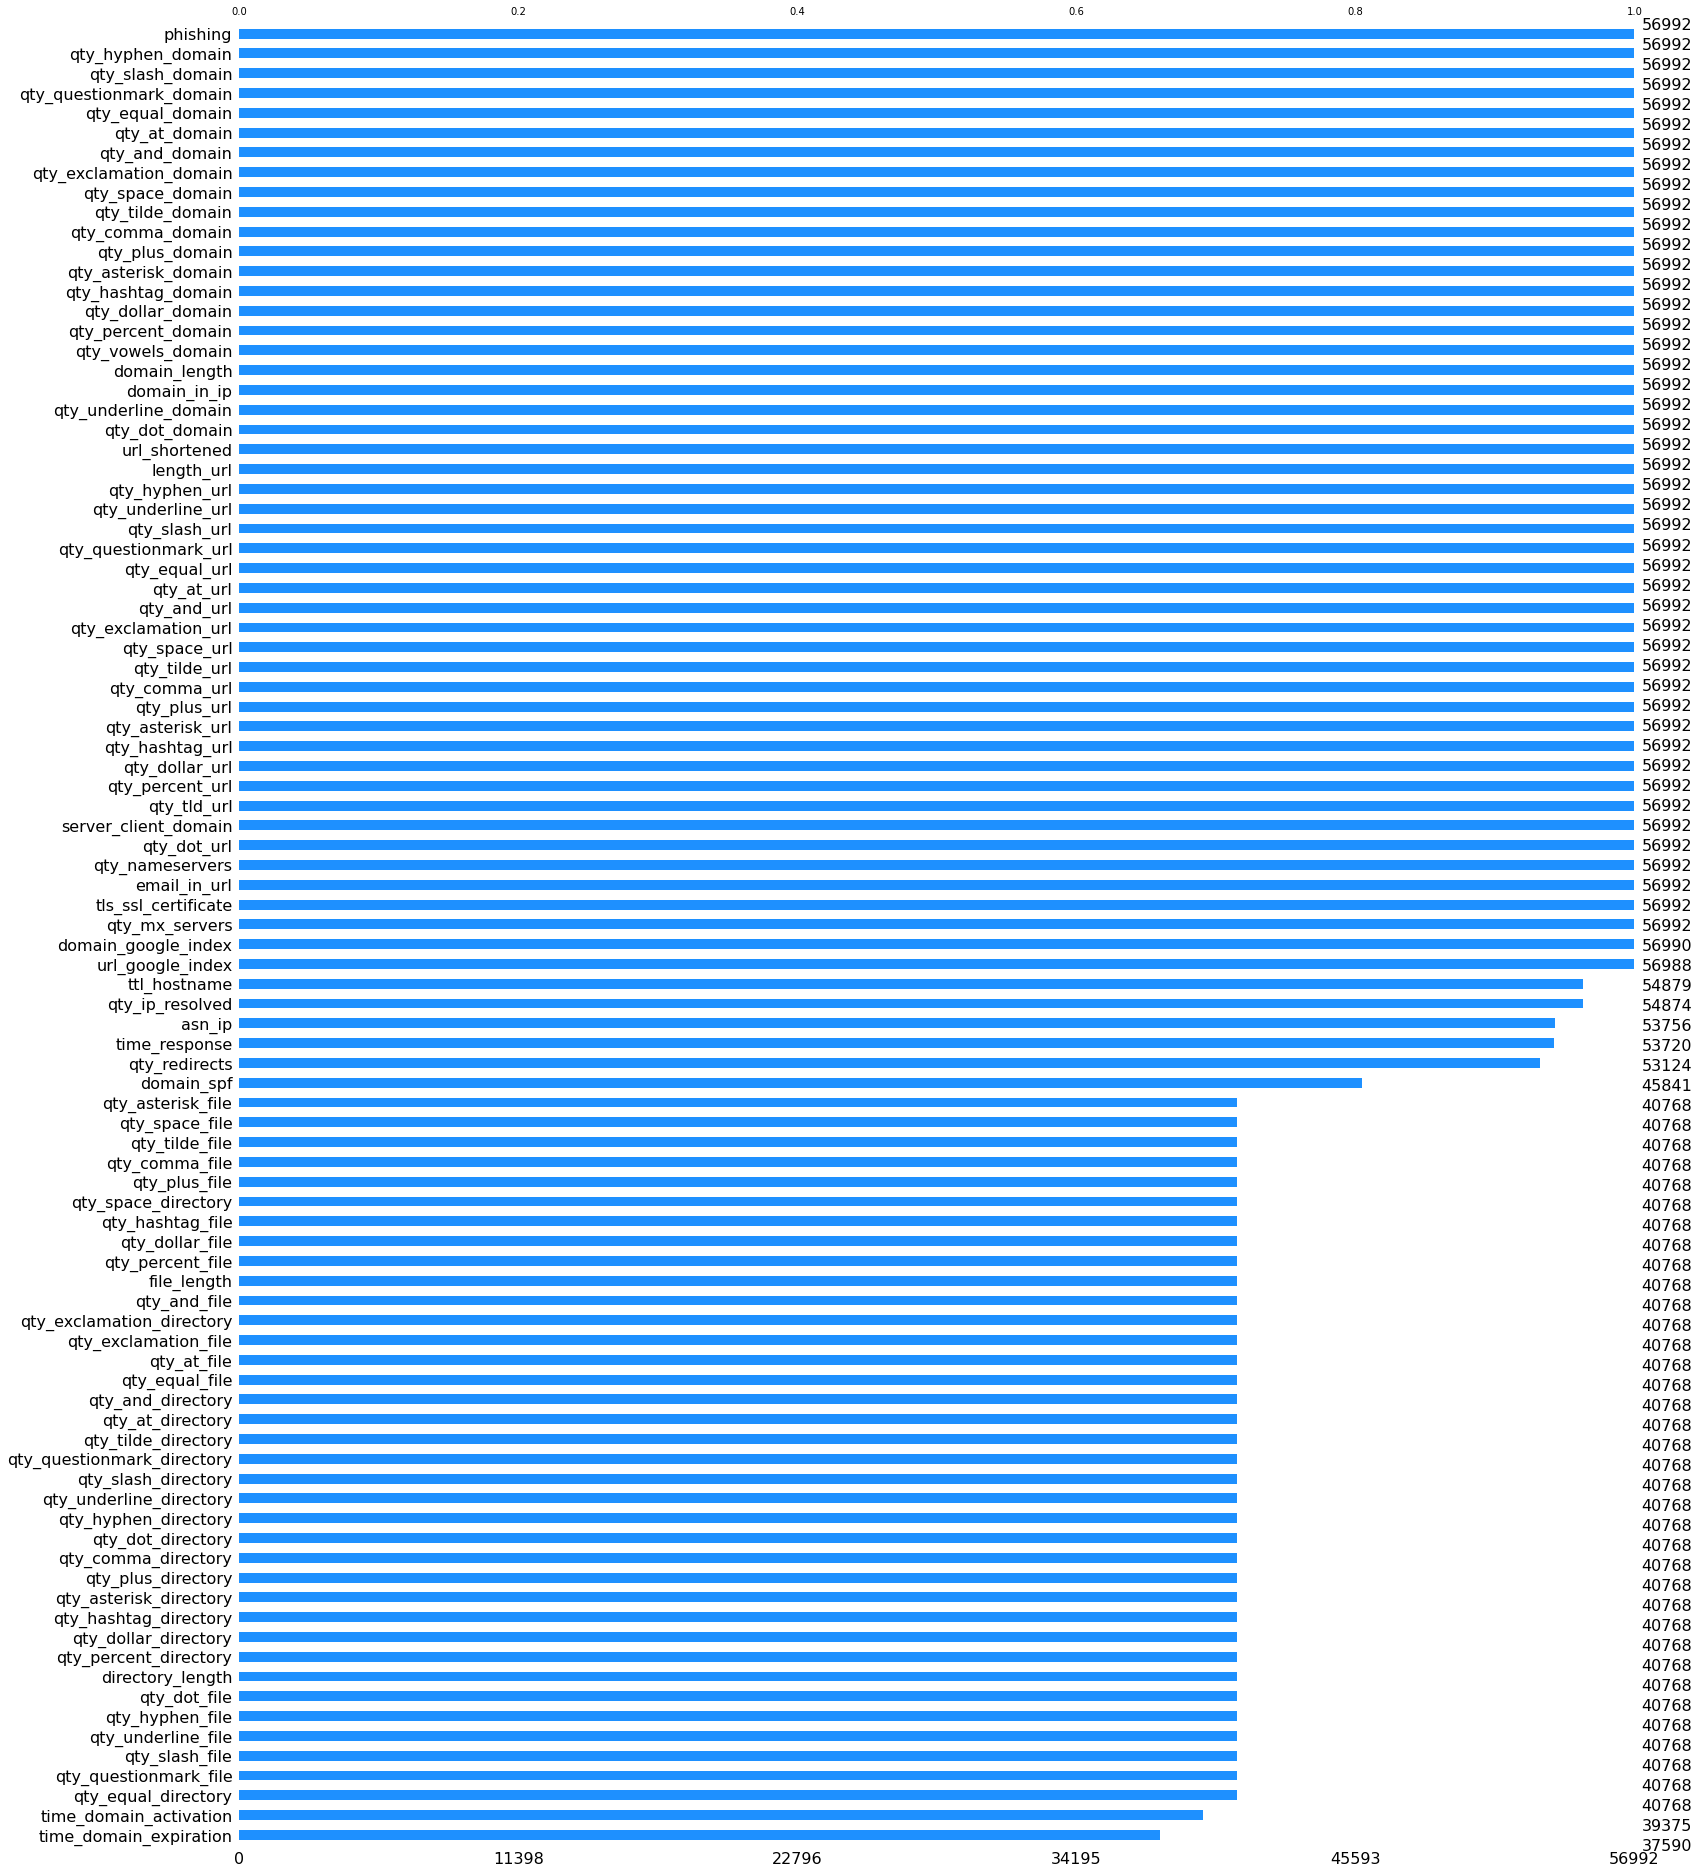

In [111]:
# visualizing the nullity by column
msno.bar(df_imp,color='dodgerblue', sort='ascending')


<AxesSubplot:>

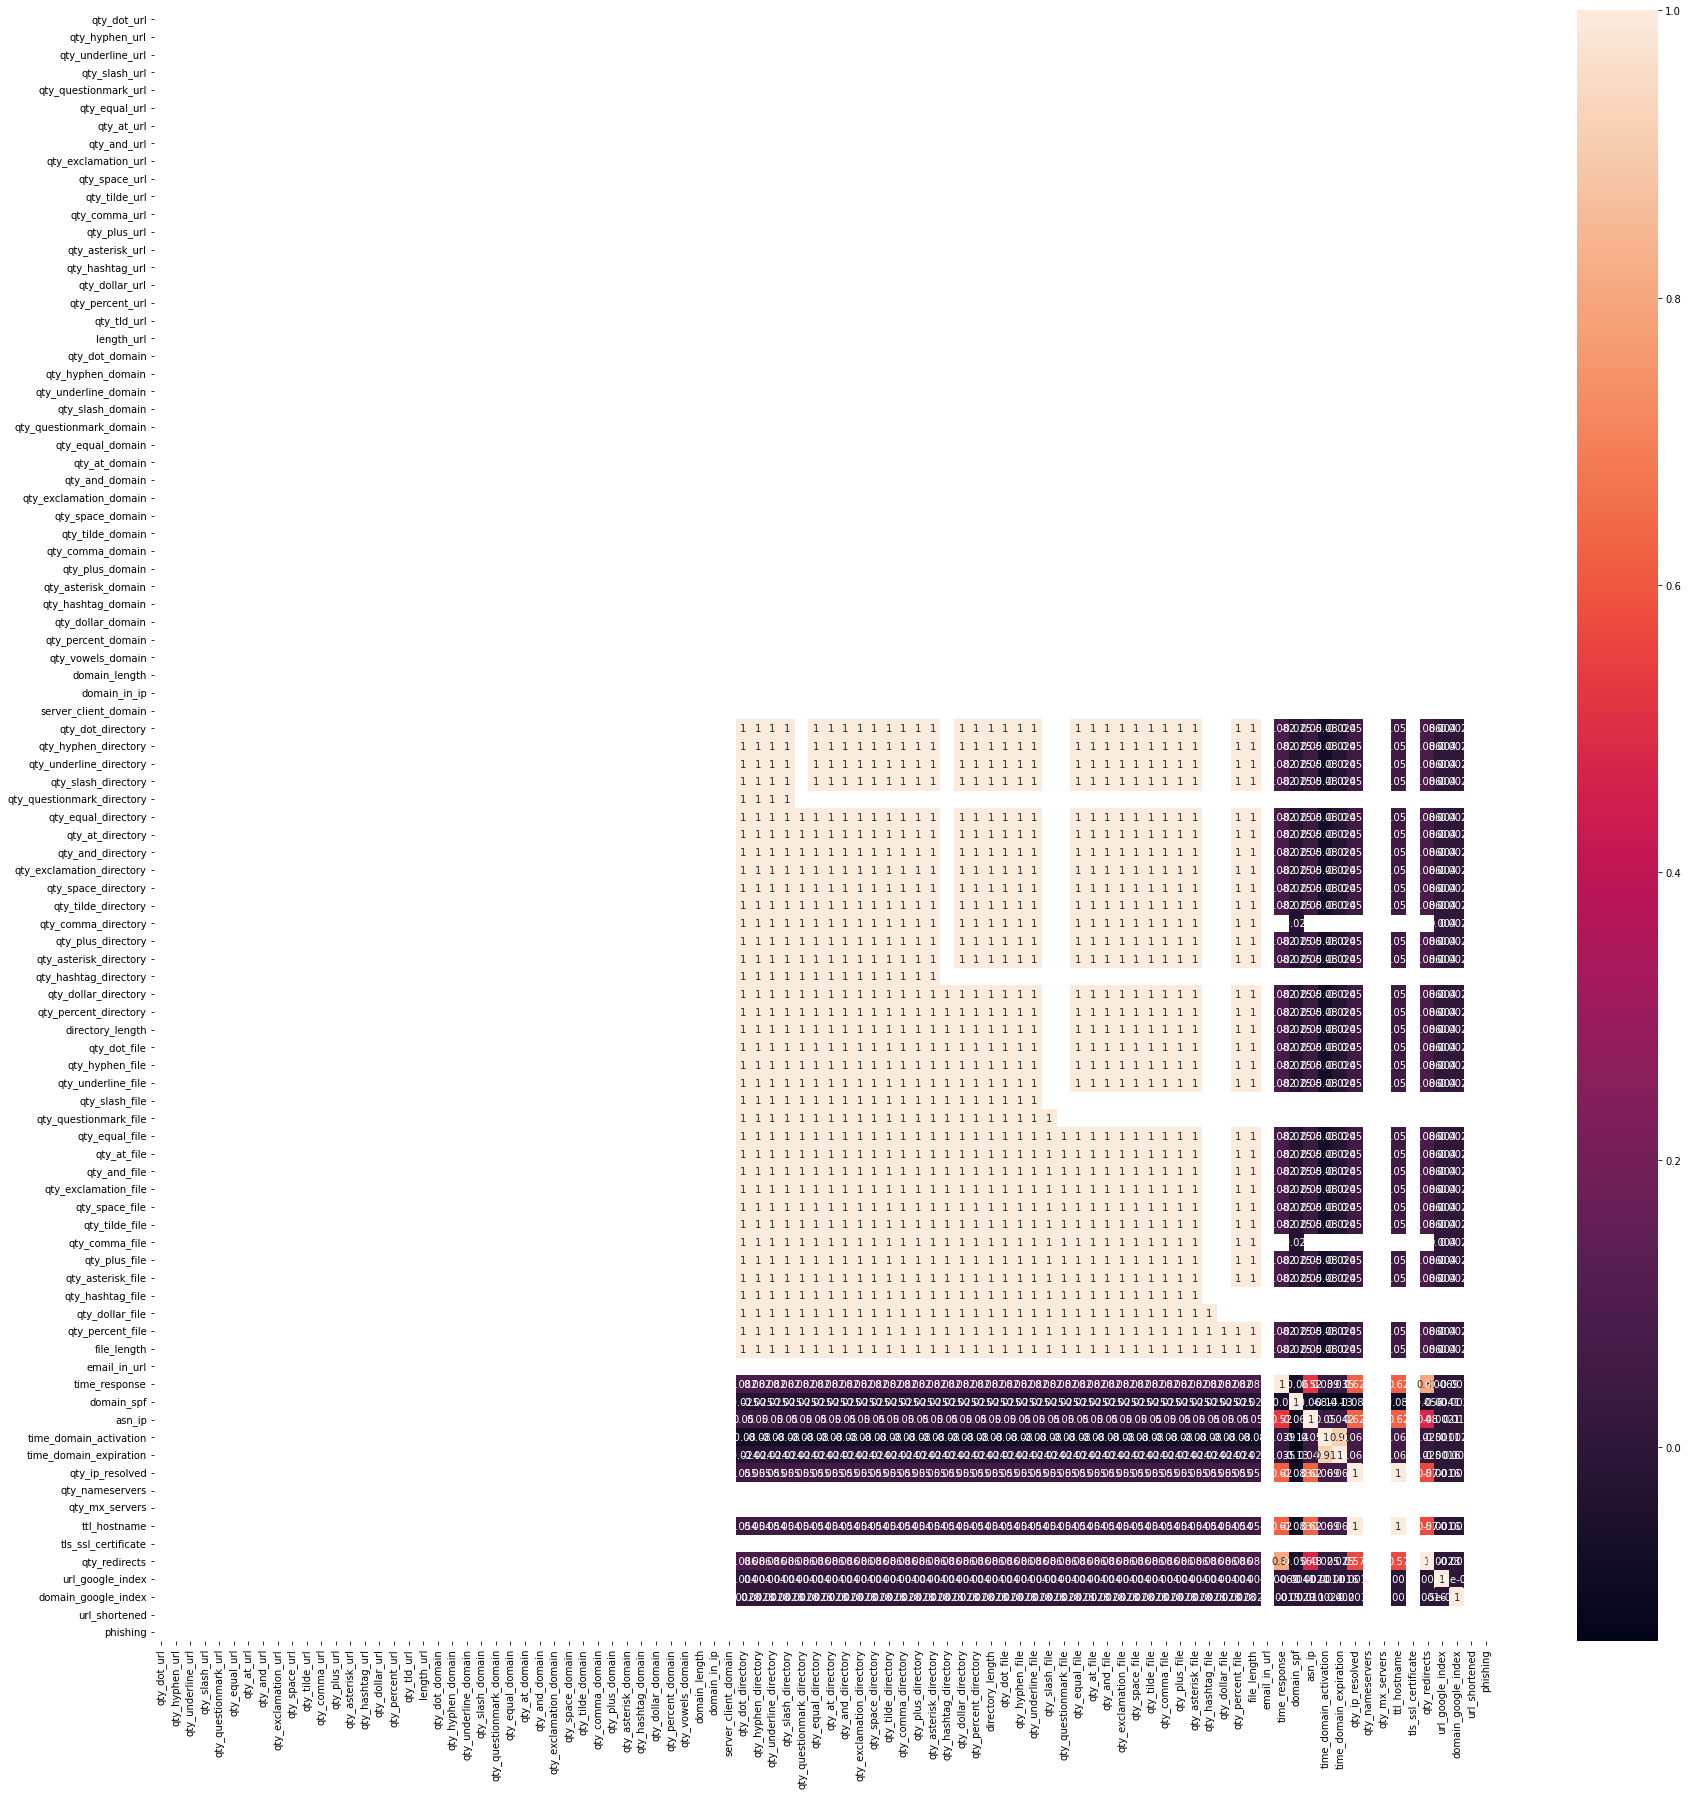

In [47]:
#missing values before imputation
matrix = np.triu(df_imp.corr().isna()) 
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_imp.isna().corr(), annot=True,ax=ax,mask=matrix)


In [24]:
df_imp.isnull().sum()

qty_dot_url                       0
qty_hyphen_url                    0
qty_underline_url                 0
qty_slash_url                     0
qty_questionmark_url              0
qty_equal_url                     0
qty_at_url                        0
qty_and_url                       0
qty_exclamation_url               0
qty_space_url                     0
qty_tilde_url                     0
qty_comma_url                     0
qty_plus_url                      0
qty_asterisk_url                  0
qty_hashtag_url                   0
qty_dollar_url                    0
qty_percent_url                   0
qty_tld_url                       0
length_url                        0
qty_dot_domain                    0
qty_hyphen_domain                 0
qty_underline_domain              0
qty_slash_domain                  0
qty_questionmark_domain           0
qty_equal_domain                  0
qty_at_domain                     0
qty_and_domain                    0
qty_exclamation_domain      

"""
Having a missing value in a machine learning model is considered very inefficient and hazardous because of the following reasons:
Reduces the efficiency of the ML model.
Affects the overall distribution of data values.
It leads to a biased effect in the estimation of the ML model.
Therefore, Now We impute the data with different imputation techiniques which we later might use it for model training. The different imputation techniques which we can use are Mean, Mode, Median, KNN Imputation.

"""

###Mean Imputation

In [30]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

(56992, 92)

In [72]:
mean_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.250337,2.812447,1.669620,5400.749522,0.515757,0.438804,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.743877,1.374398,1.722182,7078.351722,0.499756,0.708799,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2387.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
mean_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

###Mode Imputation

In [31]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df_imp)
mostFreq_imputed_df = imp_mean.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(56992, 92)

In [74]:
mostFreq_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.241034,2.812447,1.669620,5211.600225,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.745382,1.374398,1.722182,7143.689122,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1528.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
mostFreq_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

###Median Imputaion

In [32]:
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(df_imp)
median_imputed_df = imp_mean.transform(df_imp)
median_imputed_df = pd.DataFrame(median_imputed_df,columns = df_imp.columns)
median_imputed_df.shape

(56992, 92)

In [76]:
median_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.241034,2.812447,1.669620,5267.139142,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.745382,1.374398,1.722182,7111.027903,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1797.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
median_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

###KNN Imputation

In [1]:
# import sklearn.neighbors._base
# import sys

# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#using KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=7)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [ ]:
knn_imputed_df

In [ ]:
# If any features have low variance, they may not contribute in the model. If any of them exists we try to remove them.

In [ ]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(knn_imputed_df)
variance_threshold.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

In [ ]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

In [ ]:
### Dividing into the numerical columns and categorial columns for better analysis


In [ ]:
num_cols=[]
cat_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        cat_cols.append(i)
    else:
        num_cols.append(i)
        

cat_cols.remove('qty_at_domain')
num_cols.append('qty_at_domain')

print("categorical columns: \n",cat_cols)
print("******************************")
print("Numerical columns: \n",num_cols) 


In [ ]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

In [ ]:
# Plotting all the categorical columns to see how balanced they are

In [ ]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,categorical_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

In [ ]:
df_imp.skew(axis = 0, skipna = True)

In [ ]:
###Analyzing the data now
##i) First on median imputed data
##ii)then on KNN Imputed Data

In [ ]:
# I) Analysis on Median Imputed data

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = median_imputed_df.drop( columns='phishing')
Y = median_imputed_df['phishing']

In [ ]:
# Spliting the data into training(70%) and test sets(30%)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [ ]:
# Using XGBoost Model on Median imputed data training for feature importance 

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [ ]:
# Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param = {
    # Parameters that will be used
    'max_depth':[int(x) for x in np.linspace(start=5, stop=20, num=1)],
    'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=1)],
    'eta':[0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
    'subsample': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'colsample_bytree': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)]
}

xgb_random_search_CV = RandomizedSearchCV(estimator=xgb,
                                      param_distributions = param,
                                      n_iter = 100,
                                      cv=3,
                                      verbose=2,
                                      random_state=47,
                                      n_jobs=2)

xgb_random_search_CV.fit(X_train, y_train)
print(xgb_random_search_CV.best_params_)